In [96]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pylab as plt
%matplotlib inline

In [97]:
df=pd.read_csv("PatnerTransaction_new.csv")

In [98]:
df.head()

,Datafeild,TransactionCount,Sourcepartner
0,24-08-2019,2,BKCHCNBJA570
1,26-08-2019,1,CHASUS33JXXX
2,29-09-2019,10,Best Buy Canada
3,05-02-2020,34,Wortmann AG
4,07-02-2020,1,SYNNEXTW


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286247 entries, 0 to 286246
Data columns (total 3 columns):
Datafeild           286247 non-null object
TransactionCount    286247 non-null int64
Sourcepartner       284252 non-null object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


In [100]:
df.shape

(286247, 3)

In [101]:
df.describe()

,TransactionCount
count,286247.000000
mean,206.138304
std,2312.340809
min,0.000000
25%,2.000000
50%,8.000000
75%,39.000000
max,534363.000000


In [102]:
df.dropna(inplace=True)
df.isnull().sum()

Datafeild           0
TransactionCount    0
Sourcepartner       0
dtype: int64

In [103]:
dataset=df
dataset["Month"]=pd.to_datetime(df["Datafeild"]).dt.month
dataset["Year"]=pd.to_datetime(df["Datafeild"]).dt.year
dataset["Date"]=pd.to_datetime(df["Datafeild"]).dt.date
#dataset["Time"]=pd.to_datetime(df["Datafeild"]).dt.time
dataset["Week"]=pd.to_datetime(df["Datafeild"]).dt.week
dataset["Day"]=pd.to_datetime(df["Datafeild"]).dt.day_name()
dataset=df.set_index("Datafeild")
dataset.index=pd.to_datetime(dataset.index)
dataset.head(5)

,TransactionCount,Sourcepartner,Month,Year,Date,Week,Day
Datafeild,,,,,,,
2019-08-24,2,BKCHCNBJA570,8,2019,2019-08-24,34,Saturday
2019-08-26,1,CHASUS33JXXX,8,2019,2019-08-26,35,Monday
2019-09-29,10,Best Buy Canada,9,2019,2019-09-29,39,Sunday
2020-05-02,34,Wortmann AG,5,2020,2020-05-02,18,Saturday
2020-07-02,1,SYNNEXTW,7,2020,2020-07-02,27,Thursday


In [104]:
df['Sourcepartner'].isnull().sum()

0

In [105]:
df.isnull().values.any()

False

In [106]:
df['TransactionCount'].max()

534363

In [107]:
df.corr()

,TransactionCount,Month,Year,Week
TransactionCount,1.000000,-0.002387,-0.027479,-0.001736
Month,-0.002387,1.000000,-0.144877,0.974791
Year,-0.027479,-0.144877,1.000000,-0.152181
Week,-0.001736,0.974791,-0.152181,1.000000


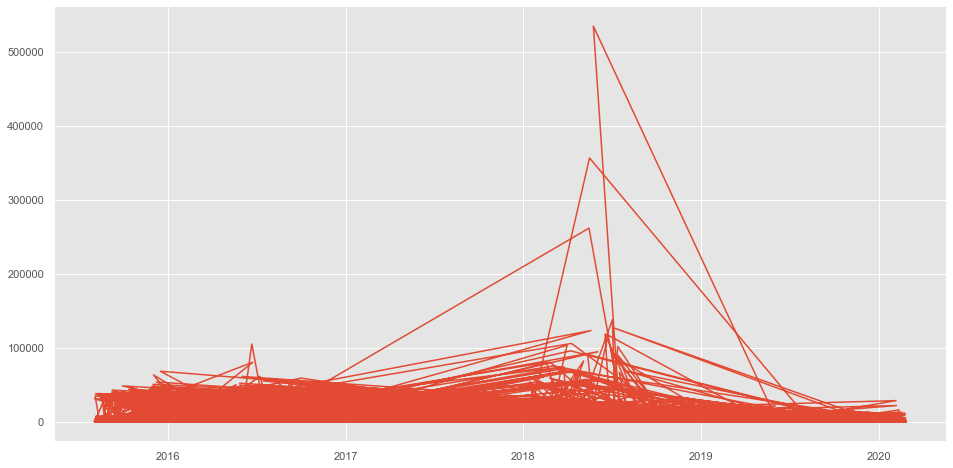

In [108]:
#setting index as date
df['Datafeild'] = pd.to_datetime(df.Datafeild,format='%d-%m-%Y')
df.index = df['Datafeild']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['TransactionCount'], label='volume transaction')

No handles with labels found to put in legend.


Text(0.5, 1, 'Sourcepartner transaction ')

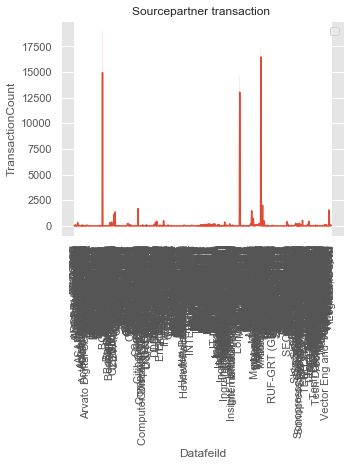

In [109]:
import seaborn as sns
from matplotlib import style

warnings.filterwarnings("ignore")
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Sourcepartner"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner")
plt.xlabel("Datafeild")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()
plt.tight_layout()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    
plt.title("Sourcepartner transaction ")

In [112]:
date1=dataset["TransactionCount"]['2020-07-02']

In [113]:
date1

Datafeild
2020-07-02      1
2020-07-02      7
2020-07-02    528
2020-07-02     22
2020-07-02     28
             ... 
2020-07-02      1
2020-07-02      6
2020-07-02     27
2020-07-02    186
2020-07-02     75
Name: TransactionCount, Length: 267, dtype: int64

TransactionCount in 2020-07


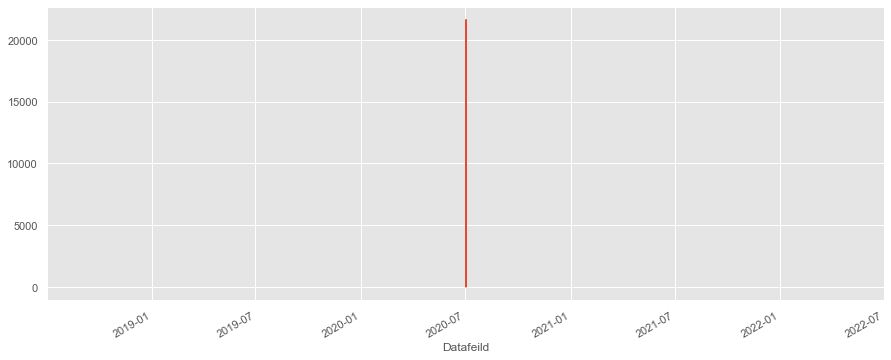

In [114]:
date1.plot()
print("TransactionCount in 2020-07")

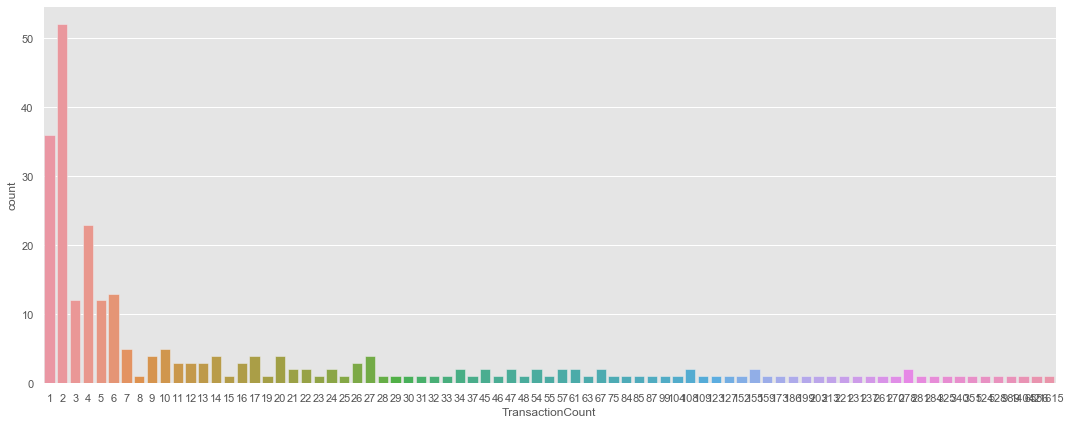

In [115]:
import seaborn as sns
sns.countplot(x=date1)

plt.tight_layout()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner Day')

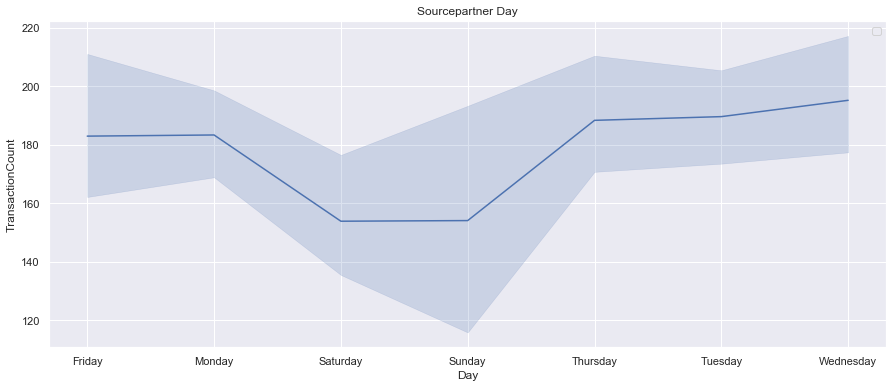

In [55]:
from matplotlib import style
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Day"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner Day  ")
plt.xlabel("Day")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
    
plt.title("Sourcepartner Day")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner Month ')

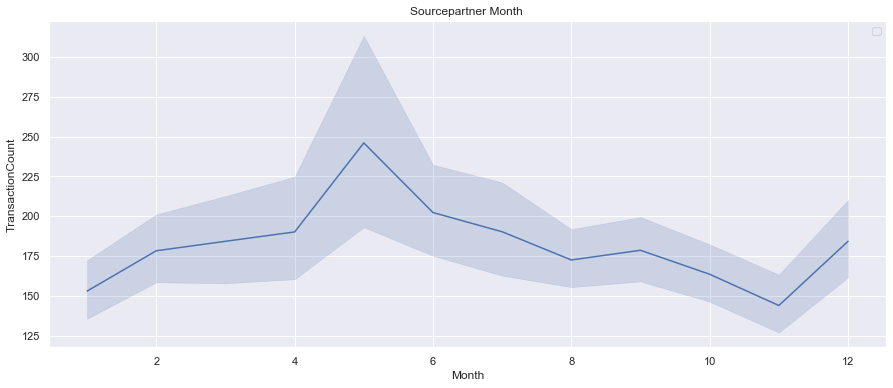

In [56]:
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner Month ")
plt.xlabel("Month")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
    
plt.title("Sourcepartner Month ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner Year ')

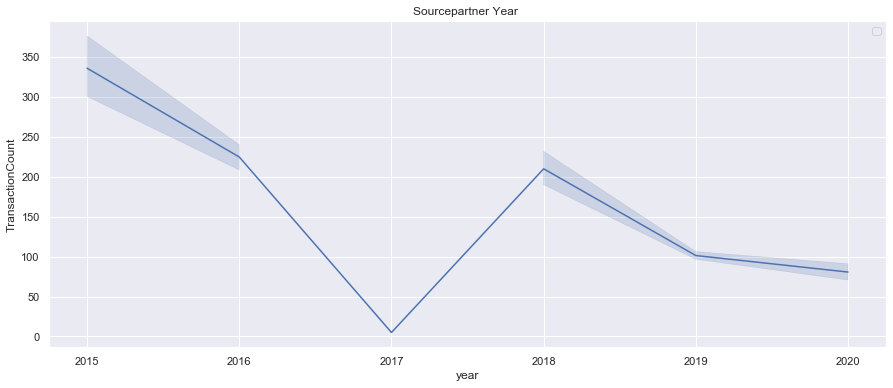

In [57]:
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner Year ")
plt.xlabel("year")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
    
plt.title("Sourcepartner Year ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner Date ')

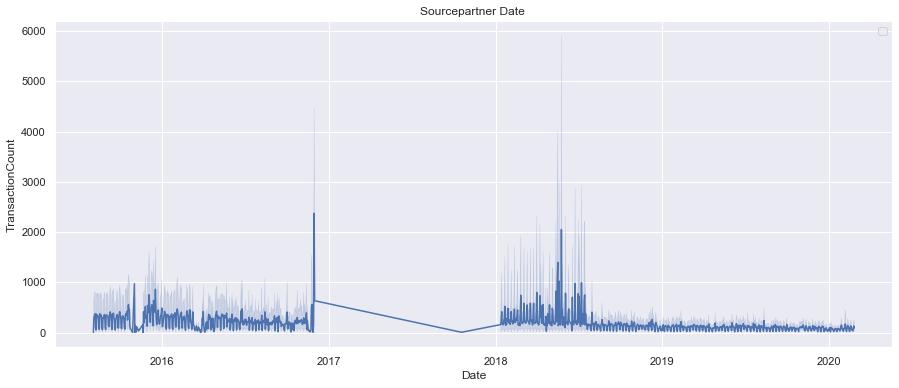

In [58]:
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Date"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner Date ")
plt.xlabel("Date")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
    
plt.title("Sourcepartner Date ")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner Week days ')

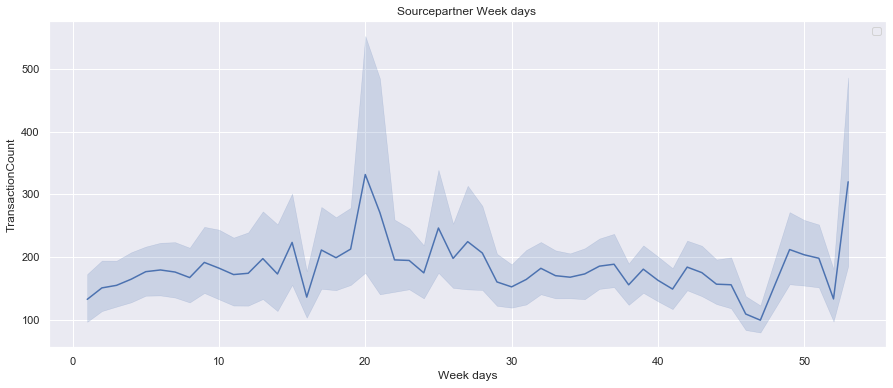

In [59]:
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Week"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner Week ")
plt.xlabel("Week days")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
    
plt.title("Sourcepartner Week days ")

In [60]:
date2=dataset["TransactionCount"]['2020']

Text(0.5, 1.0, 'TransactionCount-2020')

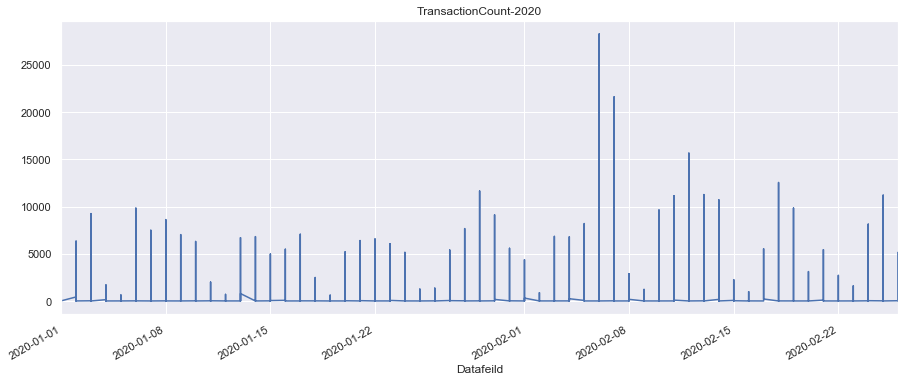

In [61]:
date2.plot()
plt.title("TransactionCount-2020")

Text(0.5, 1.0, 'TransactionCount 2019')

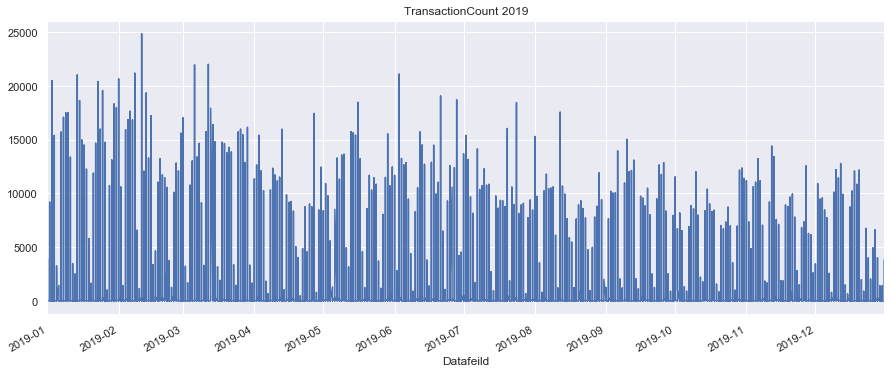

In [62]:
date3=dataset["TransactionCount"]['2019']
date3.plot()
plt.title("TransactionCount 2019")

Text(0.5, 1.0, 'TransactionCount 2018')

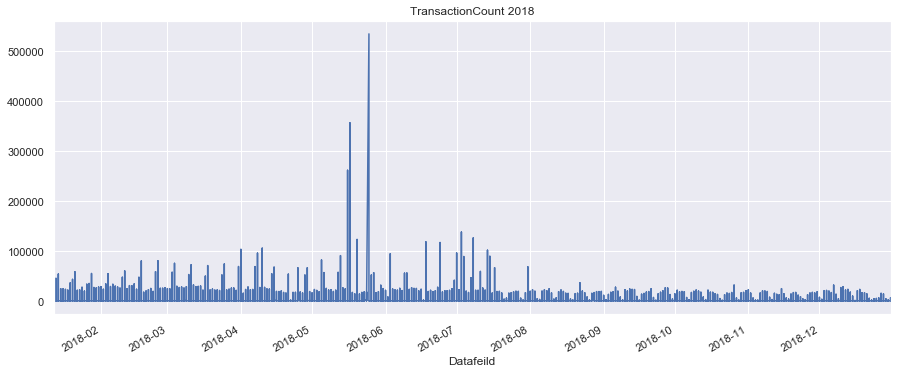

In [63]:
date4=dataset["TransactionCount"]['2018']
date4.plot()
plt.title("TransactionCount 2018")

Text(0.5, 1.0, 'TransactionCount 2017')

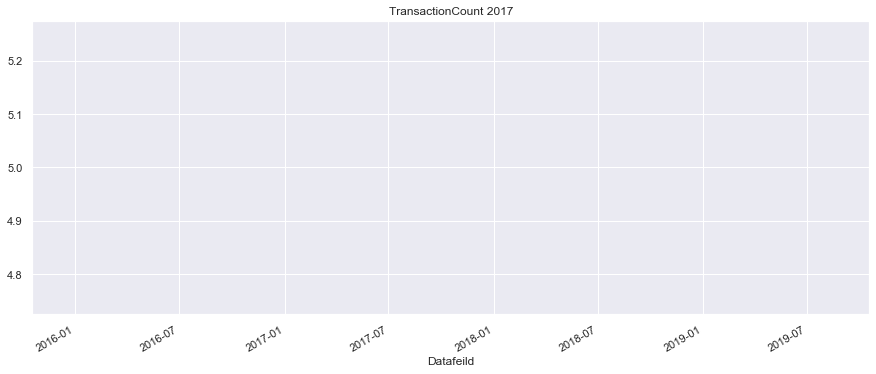

In [64]:
date5=dataset["TransactionCount"]['2017']
date5.plot()
plt.title("TransactionCount 2017")

Text(0.5, 1.0, 'TransactionCount 2016')

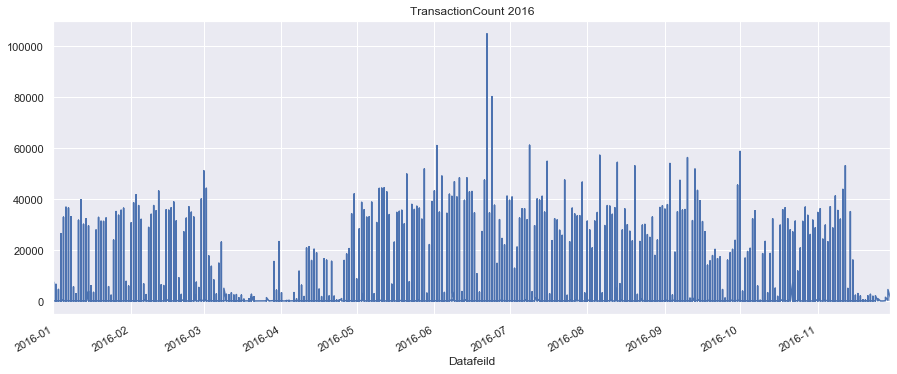

In [65]:
date6=dataset["TransactionCount"]['2016']
date6.plot()
plt.title("TransactionCount 2016")

Text(0.5, 1.0, 'TransactionCount 2015')

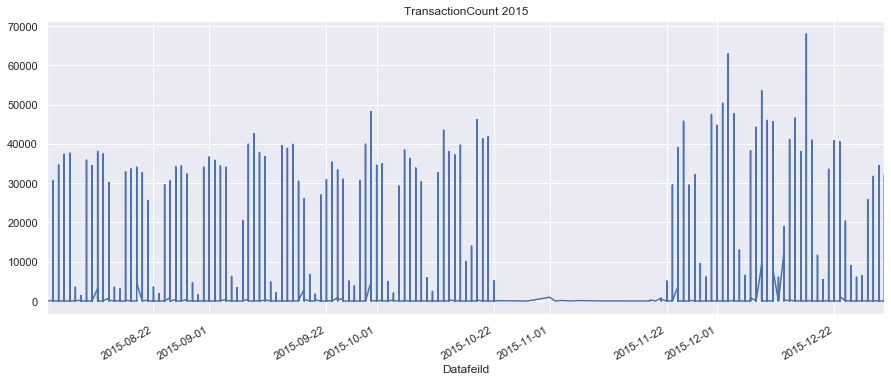

In [66]:
date7=dataset["TransactionCount"]['2015']
date7.plot()
plt.title("TransactionCount 2015")

Text(0.5, 1.0, 'TransactionCount 2015')

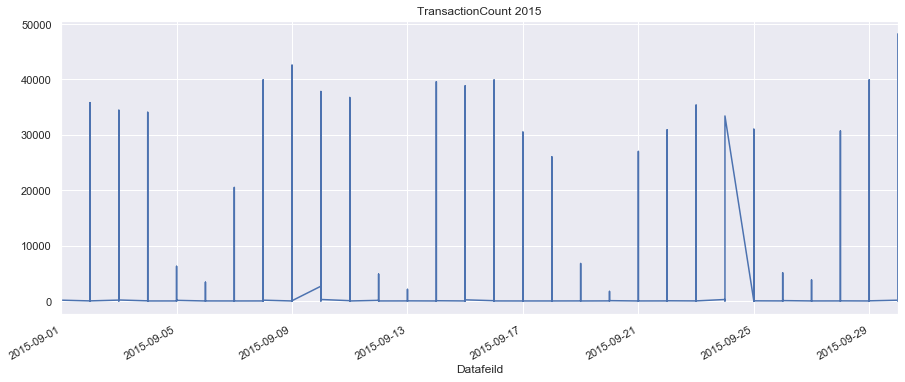

In [67]:
date7=dataset["TransactionCount"]['2015-9']
date7.plot()
plt.title("TransactionCount 2015")

Text(0.5, 1.0, 'TransactionCount 2015 Dec')

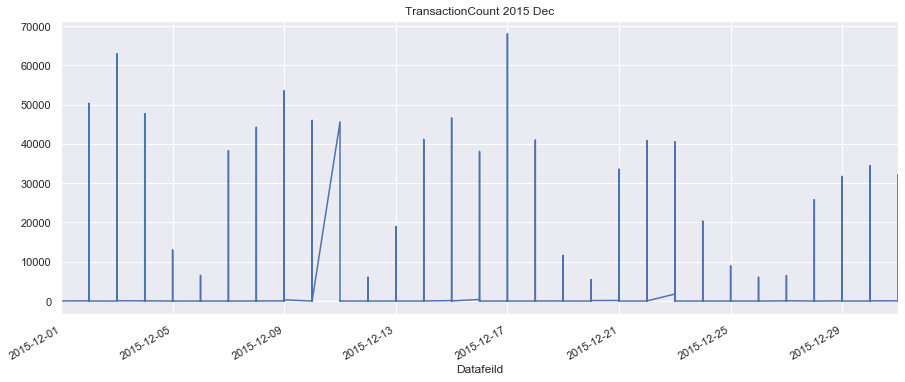

In [68]:
date7=dataset["TransactionCount"]['2015-12']
date7.plot()
plt.title("TransactionCount 2015 Dec")

Text(0.5, 1.0, 'TransactionCount 2018 Nov')

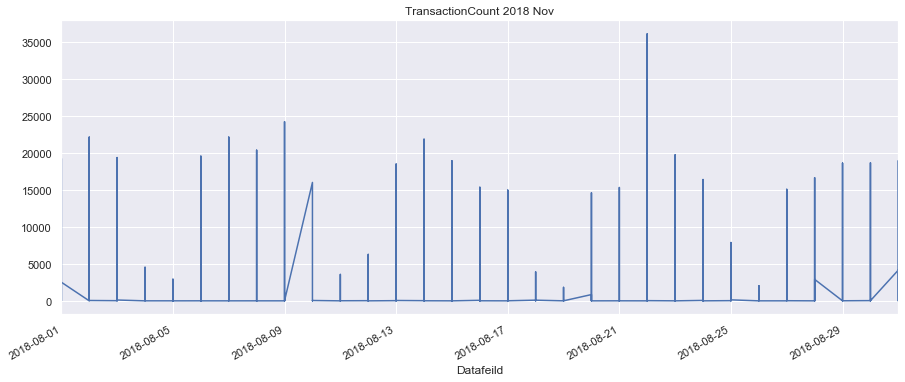

In [69]:
date7=dataset["TransactionCount"]['2018-08']
date7.plot()
plt.title("TransactionCount 2018 Nov")

In [70]:
df["Datafeild"] = pd.to_datetime(df["Datafeild"])
#bakery["Time"] = pd.to_datetime(bakery["Date"])
print("Start date: " + str(df["Datafeild"].min())[:-8])
print("End date: " + str(df["Datafeild"].max())[:-8])
print("Time span: " + str(df["Datafeild"].max()-df["Datafeild"].min())[:-8])

Start date: 2015-08-03 
End date: 2020-02-26 
Time span: 1668 days 


In [71]:
unitems = df["Sourcepartner"].nunique()
print("Number of sourcepartners : " + str(unitems))
df["Sourcepartner"].value_counts().head(50)

Number of sourcepartners : 754


Moet 97                             1185
Ingram (Canada)                     1158
Ingram (US)                         1151
Walmart                             1148
Best Buy (PC)                       1142
Target XBOX                         1122
MSFTMSAP                            1100
MSFTHTX                             1100
Bertelsmann                         1096
Best Buy Canada                     1093
Target PC                           1082
CEVA Logistics                      1079
ElCorteIngles (Spain)               1077
Ingram FPP (Canada)                 1077
Fnac                                1056
MediaMarket EMEA                    1050
Microsoft                           1042
Actebis (Germany)                   1037
Ingram (United Kingdom)             1032
Meijer                              1030
AMAZON                              1020
ExpressData                         1016
JMI, Yongin-City                    1005
Mentor Media Czech                  1004
Mentor Media, Xi

In [72]:
norm = df["Sourcepartner"].value_counts(normalize=True)
TOP60 = norm[0:60]
print(TOP60)
print(TOP60.sum())

Moet 97                             0.004169
Ingram (Canada)                     0.004074
Ingram (US)                         0.004049
Walmart                             0.004039
Best Buy (PC)                       0.004018
Target XBOX                         0.003947
MSFTMSAP                            0.003870
MSFTHTX                             0.003870
Bertelsmann                         0.003856
Best Buy Canada                     0.003845
Target PC                           0.003806
CEVA Logistics                      0.003796
ElCorteIngles (Spain)               0.003789
Ingram FPP (Canada)                 0.003789
Fnac                                0.003715
MediaMarket EMEA                    0.003694
Microsoft                           0.003666
Actebis (Germany)                   0.003648
Ingram (United Kingdom)             0.003631
Meijer                              0.003624
AMAZON                              0.003588
ExpressData                         0.003574
JMI, Yongi

NameError: name 'mdates' is not defined

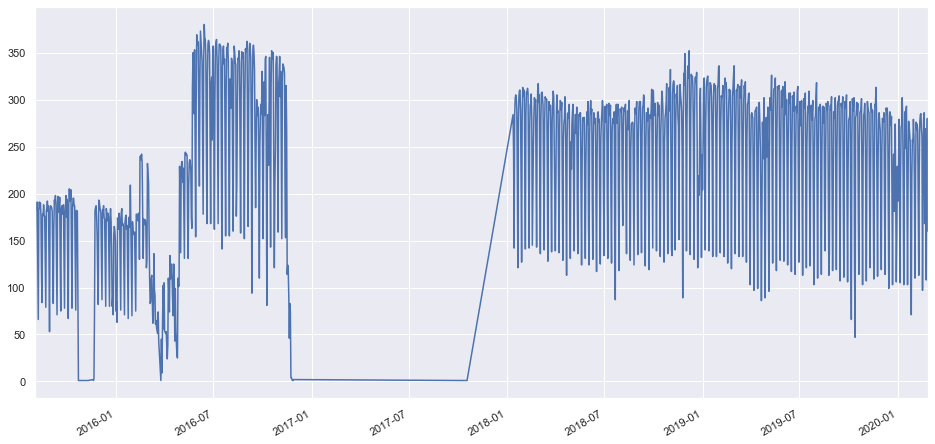

In [74]:
# number of transactions per day
df["Datafeild"] = pd.to_datetime(df["Datafeild"])
df["Weekday"] = df["Datafeild"].dt.weekday_name

# plot of number_transactions sold per day
number_transactions = df["Datafeild"].value_counts().sort_index().rename("Number of Transactions")

mean = round(number_transactions.mean(),0)
maximum_day = number_transactions.index[number_transactions==number_transactions.max()][0]

ax = number_transactions.plot(figsize=(16,8), x_compat=True)

text1 = '$\mu=$' + str(mean)[:-2]
x1 = mdates.date2num(pd.Timestamp("2016/10/31"))
x2 = mdates.date2num(maximum_day)
ax.text(x1-5, mean+5, text1, fontsize=15)
ax.text(x2+1, 300, str(maximum_day)[:-8], fontsize=10)
plt.grid(True)
plt.title("Number of transactions  every day")
plt.axhline(mean, c="k", linestyle='--')
plt.tight_layout()

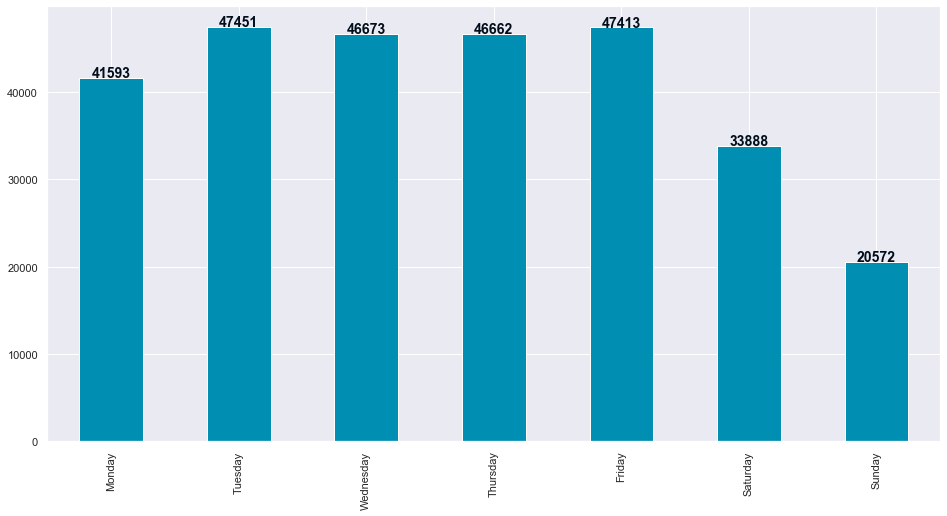

In [75]:
fig, ax = plt.subplots()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
number_transactions_weekdays = df["Weekday"].value_counts().rename("number_transactions").reindex(days)
number_transactions_weekdays.plot(kind='bar', figsize=(16,8), ax=ax, color=("#008fb3"))
for i, v in enumerate(number_transactions_weekdays.values):
    ax.text(i, v+80, str(v), color="#000d1a", fontweight='bold', fontsize=14, ha='center')

In [77]:
df.head(40)

,Datafeild,TransactionCount,Sourcepartner,Month,Year,Date,Week,Day,Weekday
Datafeild,,,,,,,,,
2019-08-24,2019-08-24,2,BKCHCNBJA570,8,2019,2019-08-24,34,Saturday,Saturday
2019-08-26,2019-08-26,1,CHASUS33JXXX,8,2019,2019-08-26,35,Monday,Monday
2019-09-29,2019-09-29,10,Best Buy Canada,9,2019,2019-09-29,39,Sunday,Sunday
2020-02-05,2020-02-05,34,Wortmann AG,2,2020,2020-02-05,6,Wednesday,Wednesday
2020-02-07,2020-02-07,1,SYNNEXTW,2,2020,2020-02-07,6,Friday,Friday
2019-08-20,2019-08-20,4,PCBCCNBJAXXX,8,2019,2019-08-20,34,Tuesday,Tuesday
2015-08-04,2015-08-04,43,CITIC BANK,8,2015,2015-08-04,32,Tuesday,Tuesday
2015-12-04,2015-12-04,18,Toys R US (Software),12,2015,2015-12-04,49,Friday,Friday
2015-08-04,2015-08-04,128,ADN,8,2015,2015-08-04,32,Tuesday,Tuesday


In [4]:
df.Datafeild[0]

'24-08-2019'

In [5]:
pd.to_datetime(df.Datafeild)

0        2019-08-24
1        2019-08-26
2        2019-09-29
3        2020-05-02
4        2020-07-02
            ...    
286242   2016-04-29
286243   2016-04-23
286244   2018-08-31
286245   2018-08-07
286246   2019-08-31
Name: Datafeild, Length: 286247, dtype: datetime64[ns]

In [6]:
temp=df.set_index(pd.to_datetime(df.Datafeild)).drop("Datafeild", axis=1 )

In [7]:
temp.head()

,TransactionCount,Sourcepartner
Datafeild,,
2019-08-24,2,BKCHCNBJA570
2019-08-26,1,CHASUS33JXXX
2019-09-29,10,Best Buy Canada
2020-05-02,34,Wortmann AG
2020-07-02,1,SYNNEXTW


In [8]:
temp.index[0]

Timestamp('2019-08-24 00:00:00')

In [9]:
pd.to_datetime(20150504)

Timestamp('1970-01-01 00:00:00.020150504')

In [10]:
pd.to_datetime("2019 May 20 10:20")

Timestamp('2019-05-20 10:20:00')

In [11]:
pd.to_datetime(["2019-08-26","2019-09-29","Best Buy Canada"],errors="coerce")

DatetimeIndex(['2019-08-26', '2019-09-29', 'NaT'], dtype='datetime64[ns]', freq=None)

In [12]:
temp.index[2]

Timestamp('2019-09-29 00:00:00')

In [13]:
list(temp.resample("D"))[0][1]

,TransactionCount,Sourcepartner
Datafeild,,
2015-01-09,52,MSFTHTX
2015-01-09,52,Tech Data (Canada) (Alt 2)
2015-01-09,7,Tech Data (Sweden)
2015-01-09,380,Insight (US)
2015-01-09,1,Target CDISI
...,...,...
2015-01-09,10,Carrefour (Spain)
2015-01-09,364,Software House
2015-01-09,1,Citibank APAC


In [14]:
temp.resample("D").first()

,TransactionCount,Sourcepartner
Datafeild,,
2015-01-09,52.0,MSFTHTX
2015-01-10,249.0,Merisel (Canada)
2015-01-11,972.0,MICROSOFT
2015-01-12,1357.0,C2000 (all European sites)
2015-01-13,NaN,NaN
...,...,...
2020-11-28,NaN,NaN
2020-11-29,NaN,NaN
2020-11-30,NaN,NaN


In [15]:
temp.resample("W-Wed").mean()

,TransactionCount
Datafeild,
2015-01-14,361.978456
2015-01-21,NaN
2015-01-28,NaN
2015-02-04,NaN
2015-02-11,321.741514
...,...
2020-11-04,99.444676
2020-11-11,NaN
2020-11-18,NaN


In [16]:
temp.resample("M").mean()

,TransactionCount
Datafeild,
2015-01-31,361.978456
2015-02-28,381.245614
2015-03-31,430.072874
2015-04-30,363.725938
2015-05-31,255.876369
...,...
2020-08-31,89.449893
2020-09-30,75.201439
2020-10-31,104.582846


In [17]:
ABG=temp.resample("YS").mean()

In [18]:
ABG

,TransactionCount
Datafeild,
2015-01-01,335.121996
2016-01-01,229.126460
2017-01-01,5.000000
2018-01-01,248.283669
2019-01-01,134.016817
2020-01-01,104.002703


In [19]:
date1=temp["TransactionCount"]['2020-07-02']

In [20]:
date1

Datafeild
2020-07-02      1
2020-07-02      7
2020-07-02    528
2020-07-02     22
2020-07-02     28
             ... 
2020-07-02      1
2020-07-02      6
2020-07-02     27
2020-07-02    186
2020-07-02     75
Name: TransactionCount, Length: 268, dtype: int64

In [21]:
temp1=temp.drop("Sourcepartner", axis=1 )

In [22]:
temp1.head()

,TransactionCount
Datafeild,
2019-08-24,2
2019-08-26,1
2019-09-29,10
2020-05-02,34
2020-07-02,1


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


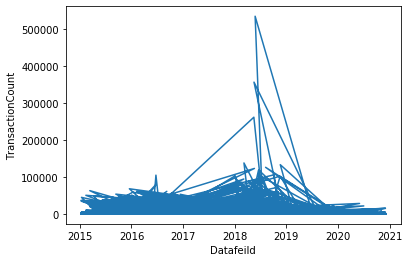

In [23]:
plt.xlabel("Datafeild")
plt.ylabel("TransactionCount")
plt.plot(temp1)

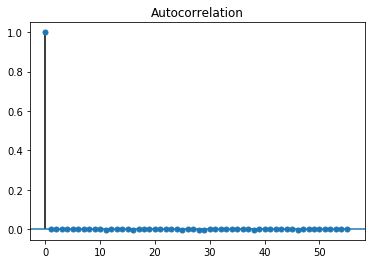

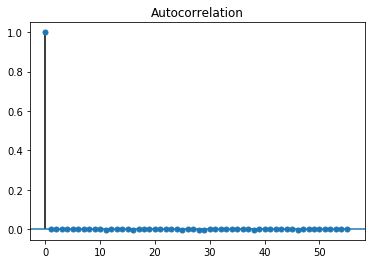

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp1)

In [25]:
temp1.shape

(286247, 1)

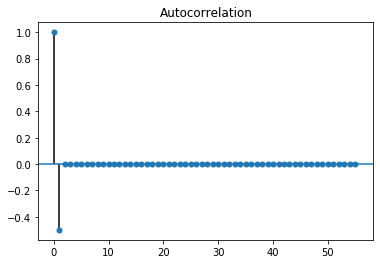

In [26]:
data_diff=temp1.diff(periods=1)
data_diff=data_diff[1:]
data_diff.head(5)
plot_acf(data_diff)

x=temp1.values
x.size


train=x[0:280000]
test=x[280000:]
predictions = []


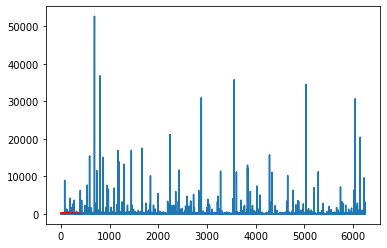

In [27]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()
prediction=model_ar_fit.predict(start=100,end=500)
plt.plot(test)
plt.plot(prediction, color='red')

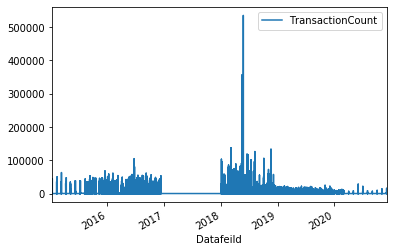

In [28]:
temp1.plot()

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#p,d,q p=peridos taken from Auto reggresive model
#d d= integrated diff b/w p and q
#q q= peridos taken from moving average
model_arima=ARIMA(train,order=(2,1,2))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

In [ ]:
predictions=model_arima_fit.forecast(steps=500)[0]
prediction

In [ ]:
plt.plot(test)
plt.plot(prediction, color='red')

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
pdq

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=(2,1,2))
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [ ]:
print("Akaike Information Critera(AIC) :",model_arima_fit.aic)

In [ ]:
print("predictions(ARIMA) :",mean_squared_error(test,predictions))